In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


To see if any NA value

In [5]:
df_train.info()
print("**************************\ndf_train has ", df_train.isna().sum().sum(), "missing values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
**************************
df_train has  149 missing values.


In [6]:
df_test.info()
print("**************************\ndf_test has ", df_test.isna().sum().sum(), "missing values.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB
**************************
df_test has  84 missing values.


In [7]:
# drop the ID columns
df_train.drop(["Loan_ID"], axis = 1, inplace=True)
df_test.drop(["Loan_ID"], axis = 1, inplace=True)

encoding

In [8]:
# dict1 = {"Male":count[('Male', 'Y')] / (count[('Male', 'N')] + count[('Male', 'Y')]),
#          "Female":count[('Female', 'Y')] / (count[('Female', 'N')] + count[('Female', 'Y')])}
# try label encoding on Gender
dict1 = {"Male":1, "Female":0}
df_train["Gender"] = df_train["Gender"].map(dict1)
df_train["Gender"].fillna(2, inplace=True) # use 2 to represent Nan

# try target encoding on Property_Area
count = df_train.groupby(["Property_Area"])["Loan_Status"].value_counts()
dict1 = {"Rural":count[('Rural', 'Y')] / (count[('Rural', 'N')] + count[('Rural', 'Y')]),
         "Urban":count[('Urban', 'Y')] / (count[('Urban', 'N')] + count[('Urban', 'Y')]),
         "Semiurban":count[('Semiurban', 'Y')] / (count[('Semiurban', 'N')] + count[('Semiurban', 'Y')])}
df_train["Property_Area"] = df_train["Property_Area"].map(dict1)

# try label encoding on Married
dict1 = {"Yes":1, "No":0}
df_train["Married"] = df_train["Married"].map(dict1)
df_train["Married"].fillna(2, inplace=True) # use 2 to represent Nan

# try target encoding on Dependents
count = df_train.groupby(["Dependents"])["Loan_Status"].value_counts()
dict1 = {"0":count[('0', 'Y')] / (count[('0', 'N')] + count[('0', 'Y')]),
         "1":count[('1', 'Y')] / (count[('1', 'N')] + count[('1', 'Y')]),
         "2":count[('2', 'Y')] / (count[('2', 'N')] + count[('2', 'Y')]),
         "3+":count[('3+', 'Y')] / (count[('3+', 'N')] + count[('3+', 'Y')])}

df_train["Dependents"] = df_train["Dependents"].map(dict1)
mode_Dependents = df_train["Dependents"].mode()[0]
df_train["Dependents"].fillna(mode_Dependents, inplace=True) # use 2 to represent Nan


# try target encoding on Education
count = df_train.groupby(["Education"])["Loan_Status"].value_counts()
dict1 = {"Graduate":1,
         "Not Graduate":0}

df_train["Education"] = df_train["Education"].map(dict1)

# try label encoding on Self_Employed
dict1 = {"Yes":1, "No":0}
df_train["Self_Employed"] = df_train["Self_Employed"].map(dict1)
df_train["Self_Employed"].fillna(2, inplace=True) # use 2 to represent Nan

# encode the target column
dict1 = {"Y":1, "N":0}
df_train["Loan_Status"] = df_train["Loan_Status"].map(dict1)

# fillna in Credit_History
df_train["Credit_History"].fillna(2, inplace=True) # use 2 to represent Nan

Fill nan in the numeric columns ["LoanAmount", "Loan_Amount_Term"]

In [9]:
# Calculate the median for each column
median_loan_amount = df_train['LoanAmount'].median()
median_loan_amount_term = df_train['Loan_Amount_Term'].median()

# Fill NaN values in each column with its respective median
df_train['LoanAmount'].fillna(median_loan_amount, inplace=True)
df_train['Loan_Amount_Term'].fillna(median_loan_amount_term, inplace=True)

In [10]:
# extract the target columns
df_y = df_train["Loan_Status"].copy()
# copy for model 2
df_train2 = df_train.copy()
df_train.drop(["Loan_Status"], axis = 1, inplace=True)

### Model 1 LogisticRegression

Accuracy: 0.8054054054054054
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.47      0.63        66
           1       0.77      0.99      0.87       119

    accuracy                           0.81       185
   macro avg       0.87      0.73      0.75       185
weighted avg       0.84      0.81      0.78       185



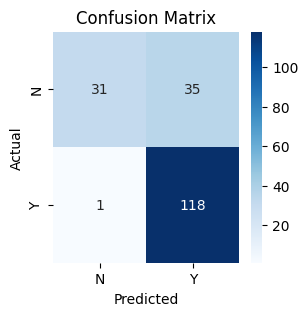

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train, df_y, test_size=0.3, random_state=15)

# Create a logistic regression model
model1 = LogisticRegression()

# Train the model
model1.fit(X_train, y_train)

# Make predictions
y_pred = model1.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using matplotlib and seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Model 2 ols 

In [12]:
# split the dataset into a training set (80%) and testing set (20%) with random seed = 1.
train, test = train_test_split(df_train2, test_size=0.3, random_state=15)

# all the variables, except the DENGUE
cols = df_train.columns.to_list()

# Model 2 : select all
# Fit on training set
formula_all = 'Loan_Status ~ ' + ' + '.join(cols) # all
model2 = ols(formula_all, data=train).fit() 
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:            Loan_Status   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     9.625
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           1.49e-15
Time:                        00:52:05   Log-Likelihood:                -222.81
No. Observations:                 429   AIC:                             469.6
Df Residuals:                     417   BIC:                             518.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0367      0.47

In [13]:
# Predict the training and testing set
# all numeric features
print('Model 2 (select all features): ')
y_pred = model2.predict(test)
y_pred

Model 2 (select all features): 


44     0.722456
305    0.606055
499    0.171786
192    0.678988
489    0.676987
         ...   
47     0.734939
411    1.150796
526    0.850647
93     0.771081
35     0.711451
Length: 185, dtype: float64

#### Use ROC curve to find the optimal_threshold

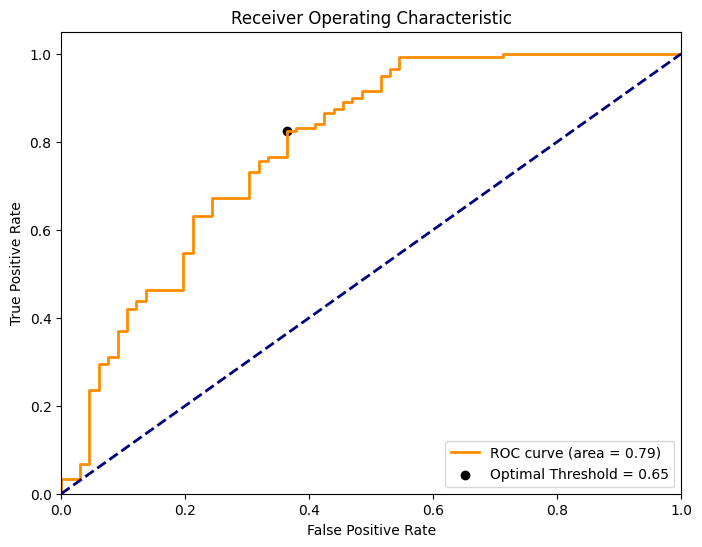

Optimal Threshold: 0.6460046384887838


In [14]:
# Compute TPR, FPR, and thresholds
fpr, tpr, thresholds = roc_curve(test["Loan_Status"], y_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Optimal threshold
print(f'Optimal Threshold: {optimal_threshold}')


Accuracy: 0.7513513513513513
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65        66
           1       0.80      0.82      0.81       119

    accuracy                           0.75       185
   macro avg       0.73      0.73      0.73       185
weighted avg       0.75      0.75      0.75       185



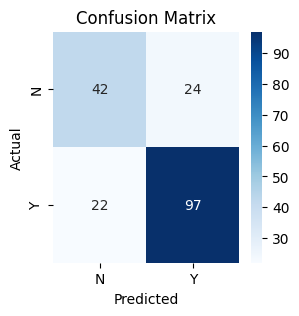

In [15]:
# Convert probabilities to binary predictions based on the optimal threshold
y_pred = (y_pred > optimal_threshold).astype(int)

# Evaluate the model
accuracy = accuracy_score(test['Loan_Status'], y_pred)
report = classification_report(test['Loan_Status'], y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting using matplotlib and seaborn
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [16]:
y_pred

44     1
305    0
499    0
192    1
489    1
      ..
47     1
411    1
526    1
93     1
35     1
Length: 185, dtype: int32